In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error ,r2_score


In [2]:
import kagglehub
path = kagglehub.dataset_download("yasserh/housing-prices-dataset")

print("Path to dataset files:", path)

100%|██████████| 4.63k/4.63k [00:00<00:00, 6.99MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/yasserh/housing-prices-dataset/versions/1


In [4]:
data=pd.read_csv('/content/Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [12]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Encode categorical columns
encoder = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:  # Select only object (string) columns
    data[col] = encoder.fit_transform(data[col])

# Split features and target
x = data.drop(columns=['price'])  # Drop the target column
y = data['price']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)  # Ensure all features are numeric before scaling

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [13]:
#model
from sklearn.linear_model import LinearRegression
from sklearn.tree  import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [15]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Dictionary to store model results
results = {}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, Y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Evaluate performance
    rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
    r2 = r2_score(Y_test, y_pred)

    # Save results
    results[name] = {'RMSE': rmse, 'R² Score': r2}

# Display results
print("Model Performance Comparison:")
results_df = pd.DataFrame(results).T
display(results_df)

Model Performance Comparison:


,RMSE,R² Score
Linear Regression,1.238970e+06,0.643542
Decision Tree,1.836227e+06,0.217041
Random Forest,1.356279e+06,0.572846
Gradient Boosting,1.259184e+06,0.631816


<ipython-input-16-9c13595dd761>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y='RMSE', data=results_df.reset_index(), palette="Blues_d")


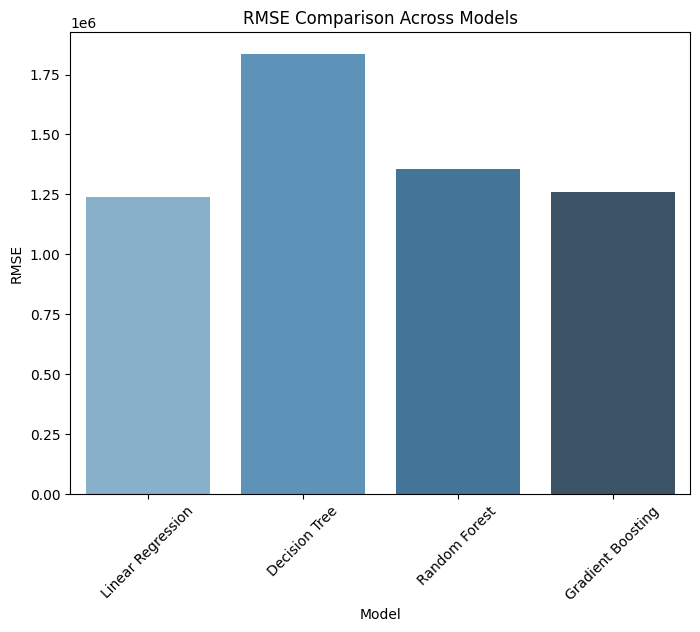

<ipython-input-16-9c13595dd761>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y='R² Score', data=results_df.reset_index(), palette="Greens_d")


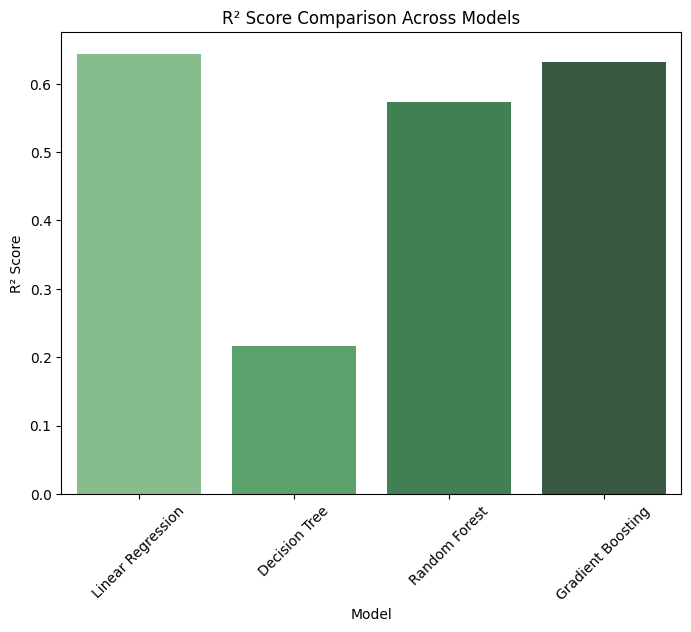

In [16]:
# Plot RMSE comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=results_df.index, y='RMSE', data=results_df.reset_index(), palette="Blues_d")
plt.title("RMSE Comparison Across Models")
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.xticks(rotation=45)
plt.show()

# Plot R² score comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=results_df.index, y='R² Score', data=results_df.reset_index(), palette="Greens_d")
plt.title("R² Score Comparison Across Models")
plt.xlabel("Model")
plt.ylabel("R² Score")
plt.xticks(rotation=45)
plt.show()



In [17]:
# Find the best model based on R² Score
best_model_name = results_df['R² Score'].idxmax()
print(f"The best model is: {best_model_name} with R² Score of {results_df.loc[best_model_name, 'R² Score']:.4f} and RMSE of {results_df.loc[best_model_name, 'RMSE']:.4f}")


The best model is: Linear Regression with R² Score of 0.6435 and RMSE of 1238970.4429
